In [194]:
import pandas as pd
import numpy as np

import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer

import nltk
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer

from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import recall_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dovidb\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Import Data

In [3]:
data = pd.read_csv("train.csv",usecols=["id","comment_text", "toxic"])

In [4]:
data.head()

,id,comment_text,toxic
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0


## Data Cleaning and Pre-Processing

In [7]:
data.toxic.value_counts()

0    144277
1     15294
Name: toxic, dtype: int64

In [8]:
# 10.6 percent of comments are toxic 
data[data["toxic"]==1].count()[1] / data[data["toxic"]==0].count()[1] *100

10.600442204925248

In [9]:
# create a new column with the length of the comment 
data['comment_length'] = data['comment_text'].str.len()

In [2]:
# test_string=data.iloc[3, 1]

In [1]:
def number_of_upper(words):
    '''function to count the number of upper case letter in the comment'''
    return(sum(1 for c in words if c.isupper()))

In [15]:
# apply function to count number of uppercase letters in each comment 
data["number_uppercase"] = data['comment_text'].map(number_of_upper)

In [17]:
# create a new column that is the percent of words in the column that are upper case
data["percent_uppercase"] = data['number_uppercase'] / data['comment_length']

In [19]:
data.describe()

,toxic,comment_length,number_uppercase,percent_uppercase
count,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,394.073221,17.159628,0.051622
std,0.294379,590.720282,96.528103,0.092837
min,0.000000,6.000000,0.000000,0.000000
25%,0.000000,96.000000,3.000000,0.020710
50%,0.000000,205.000000,7.000000,0.031746
75%,0.000000,435.000000,15.000000,0.048830
max,1.000000,5000.000000,4960.000000,0.998189


## Examine percent toxic by percent uppercase

In [248]:
data[data.percent_uppercase<.2].toxic.mean()

0.0858824290241221

In [243]:
data[data.percent_uppercase<.2].toxic.count()

154630

In [239]:
data[(data.percent_uppercase<.45)&(data.percent_uppercase>=.20)].toxic.mean()

0.20387243735763097

In [249]:
data[(data.percent_uppercase<.45)&(data.percent_uppercase>=.20)].toxic.count()

2634

In [242]:
data[(data.percent_uppercase<.75)&(data.percent_uppercase>=.45)].toxic.mean()

0.6190926275992439

In [250]:
data[(data.percent_uppercase<.75)&(data.percent_uppercase>=.45)].toxic.count()

1058

In [241]:
data[data.percent_uppercase>.75].toxic.mean()

0.6584362139917695

In [251]:
data[data.percent_uppercase>.75].toxic.count()

1215

## Examine percent toxic by comment length

In [266]:
data[data.comment_length<35].toxic.mean()

0.17674021959279396

In [268]:
data[data.comment_length<35].toxic.count()

8784

In [267]:
data[(data.comment_length>=35)&(data.comment_length<96)].toxic.mean()

0.14931806484817292

In [279]:
data[(data.comment_length>=35)&(data.comment_length<96)].toxic.count()

31088

In [253]:
data[(data.comment_length>=96)&(data.comment_length<205)].toxic.mean()

0.10127220052903388

In [280]:
data[(data.comment_length>=96)&(data.comment_length<205)].toxic.count()

39695

In [254]:
data[(data.comment_length>=205)&(data.comment_length<435)].toxic.mean()

0.07105914099392849

In [281]:
data[(data.comment_length>=205)&(data.comment_length<435)].toxic.count()

40023

In [276]:
data[(data.comment_length>=435)&(data.comment_length<2500)].toxic.mean()

0.051988261583609294

In [278]:
data[(data.comment_length>=435)&(data.comment_length<2500)].toxic.count()

37143

In [275]:
data[data.comment_length>=2500].toxic.mean()

0.09936575052854123

In [277]:
data[data.comment_length>=2500].toxic.count()

2838

## Process text data 

In [139]:
# Create a new column to work on the text
data['clean_text'] = data['comment_text']

In [81]:
# remove new line, make lower case, remove apostrophe 

def remove_new_line(mystring):
    mystring = mystring.replace("\n", " ") #  removes the new line characters 
    mystring = mystring.lower()            # turns the whole string to lower case letters 
    mystring = mystring.replace("'", "")   # removes appostrophes 
    return(mystring)

In [95]:
# create regex that will allow for grabing only the words in the comments
prog = re.compile("[a-z]+")
result = prog.findall(test_s_2)

In [135]:
def grab_words(words):
    '''grabs only the words from the comments and returns them in a string'''
    return(' '.join(prog.findall(words)))

In [99]:
def remove_stop_words(word_list):
    new_words = []
    for word in word_list:
        if not word in stopwords.words('english'):
            new_words.append(word)
    return(new_words)

### Run data pre-processing

In [140]:
data["clean_text"] = data["clean_text"].map(remove_new_line)

In [141]:
data["clean_text"] = data["clean_text"].map(grab_words)

In [180]:
# run the cleaned data through a vectorizer which also removes the english stopwords 
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(data.clean_text)
X = X.tocsc()
y = np.array(data.toxic , dtype=int)

In [181]:
# Split the data for training and testing  
X_train, X_test, Y_train, Y_test = train_test_split(
 X, Y, test_size=0.2, random_state=42)

In [188]:
# reshape for ml to work 
y_train = np.array(Y_train, dtype=int)
y_test = np.array(Y_test, dtype=int)

## Run Naive Bayes Classifier 

In [186]:
# create an instance of the Naive Bayes classifier 
mNB = MultinomialNB()
# fit the training data. 
mNB.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [189]:
mNB.score(X_train, y_train)

0.9568136241148085

In [191]:
#  Accruacy score for the test set  
mNB.score(X_test, y_test)

0.9411875293749021

In [196]:
metrics.roc_auc_score(y_test,mNB.predict_proba(X_test)[:,1])

0.8977721716201302

In [209]:
print(metrics.f1_score(y_test, mNB.predict(X_test)))

0.6720251616285164


In [212]:
# We see how the f1-score and the accuracy of the algorithm change with different thresholds. 
thresh_list = np.arange(0.45,0.60,0.01)  
mNB_proba = mNB.predict_proba(X_test)[:,1]
print("Threshold---f1-score---accuracy")
for value in thresh_list:
    prediction = mNB_proba > value
    f1_score_v = metrics.f1_score(y_test,prediction)
    total_score = metrics.accuracy_score(y_test,prediction)
    print(value , f1_score_v, total_score )

Threshold---f1-score---accuracy
0.45 0.6707946336429308 0.9400281999060003
0.46 0.6720745598895409 0.9404668651104496
0.47000000000000003 0.6715176715176715 0.9405921980260066
0.48000000000000004 0.6718777140871982 0.9408115306282312
0.49000000000000005 0.6713140467061693 0.940905530314899
0.5 0.6720251616285164 0.9411875293749021
0.51 0.6732083406343087 0.941563528121573
0.52 0.6735769501054111 0.9417828607237976
0.53 0.6735915492957747 0.9419081936393545
0.54 0.6719632768361582 0.9417828607237976
0.55 0.6713906111603188 0.9418768604104653
0.56 0.6714057224098098 0.9420648597838007
0.5700000000000001 0.6709493219129193 0.9422215259282469
0.5800000000000001 0.6714387974230493 0.9424721917593608
0.5900000000000001 0.6716899892357374 0.9426601911326963


#### Applying a threshold of greater than 0.53 gives the greatest F1-score of 0.674

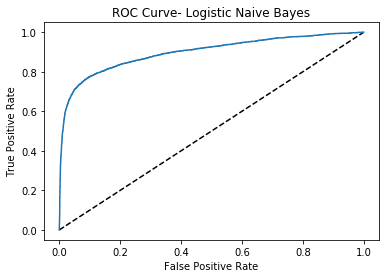

In [195]:
# ROC CURVE 

y_pred_prob = mNB.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Logistic Naive Bayes')
plt.show()

### Run a Stemmer on the words 

In [197]:
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english", ignore_stopwords=True)

In [220]:
analyzer = CountVectorizer(stop_words='english').build_analyzer()

def stemmed_words(doc):
    return (stemmer.stem(w) for w in analyzer(doc))

stem_vectorizer = CountVectorizer(analyzer=stemmed_words)

  (0, 2)	1
  (0, 0)	1
  (0, 1)	1
  (0, 3)	1
['chanc', 'hero', 'rememb', 'show']


In [221]:
# apply the stemmer and count vectorizer to the data 
X_stem = stem_vectorizer.fit_transform(data.clean_text)
X_stem = X_stem.tocsc()

In [223]:
# Split the data for training and testing  
X_train_stem, X_test_stem, Y_train_stem, Y_test_stem = train_test_split(X_stem, Y, test_size=0.2, random_state=42)

In [224]:
# reshape for ml to work 
y_train_stem = np.array(Y_train_stem, dtype=int)
y_test_stem = np.array(Y_test_stem, dtype=int)

In [229]:
# create an instance of the Naive Bayes classifier 
mNB_stem = MultinomialNB()
# fit the training data. 
mNB_stem.fit(X_train_stem , y_train_stem)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [230]:
mNB_stem.score(X_train_stem , y_train_stem)

0.9548395688412609

In [232]:
mNB_stem.score(X_test_stem , y_test_stem)

0.94209619301269

In [233]:
metrics.roc_auc_score(y_test_stem,mNB_stem.predict_proba(X_test_stem)[:,1])

0.9006825068771817

In [234]:
print(metrics.f1_score(y_test_stem, mNB_stem.predict(X_test_stem)))

0.6792780284623394


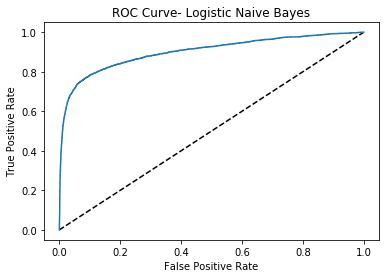

In [235]:
# ROC CURVE 

y_pred_prob = mNB_stem.predict_proba(X_test_stem)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test_stem, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Logistic Naive Bayes')
plt.show()

# try TF-IDF 

In [203]:
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train)


In [204]:
# create an instance of the Naive Bayes classifier 
mNB_tf = MultinomialNB()
# fit the training data. 
mNB_tf.fit(X_train_tfidf, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [205]:
mNB_tf.score(X_train, y_train)

0.9349188443943097

In [206]:
mNB_tf.score(X_test, y_test)

0.9308162306125646

In [207]:
metrics.roc_auc_score(y_test,mNB_tf.predict_proba(X_test)[:,1])

0.8131802799456974

In [208]:
print(metrics.f1_score(y_test, mNB_tf.predict(X_test)))

0.45156482861400893


In [214]:
# Ran TF-IDF, this made the model worse. 

# Random Forest Classifier 

In [215]:
rfc = RandomForestClassifier(n_jobs=-1, random_state = 42)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=-1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [216]:
training_accuracy = rfc.score(X_train, y_train)
test_accuracy = rfc.score(X_test, y_test)

print("Accuracy on training data: {:2f}".format(training_accuracy))
print("Accuracy on test data:     {:2f}".format(test_accuracy))

Accuracy on training data: 0.994838
Accuracy on test data:     0.949272


In [217]:
metrics.roc_auc_score(y_test,rfc.predict_proba(X_test)[:,1])

0.9349407749612714

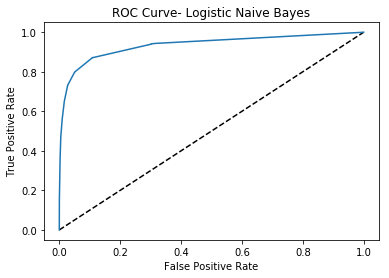

In [218]:
# ROC CURVE 

y_pred_prob_rf = rfc.predict_proba(X_test)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob_rf)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve- Logistic Naive Bayes')
plt.show()

In [219]:
print(metrics.f1_score(y_test, rfc.predict(X_test)))

0.6790882061446978
